# 05: Covariance based clustering

In [1]:
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd
import numpy as np

data = pd.read_csv("training_pivot.csv", 
                   index_col="date")
data.index = pd.to_datetime(data.index)
data = data.resample('M').sum()
data = data.T
data

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


date,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31
Total,43347.4855,23756.7667,37784.6243,19860.4246,34531.2473,2363.1088,9649.4321,9881.8506,11306.1056,16066.5439,12118.2309,6529.3997,2171.4008,4638.9813,3394.3797,1482.344,6240.3639,6227.278,9508.7676,6331.2085,7236.5693,13691.0258,7062.9143,3678.0051
Artigos Decorativos,24.0525,461.5050,622.0800,126.3650,54.4850,0.0000,0.0000,5.2250,0.0000,97.4050,24.6400,20.9000,0.0000,38.7200,0.0000,0.000,655.8850,0.000,0.0000,0.0000,0.0000,0.0000,26.2680,0.0000
Bases e Floreiras,525.7350,394.3500,379.1060,371.2700,16.5000,0.0000,15.5840,0.0000,0.0000,327.7580,101.7500,0.0000,136.0360,633.0000,7.9750,106.700,0.0000,38.500,0.0000,0.0000,55.0275,133.6500,0.0000,0.0000
Casa,0.0000,49.3250,0.0000,49.5160,0.0000,24.3350,0.0000,101.7500,0.0000,184.8200,0.0000,0.0000,0.0000,31.1850,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Flores,3538.5955,1526.6135,6407.9869,378.2920,862.7100,655.7890,157.4625,297.1860,302.4660,466.9227,349.3346,202.2325,322.0722,310.7750,187.5870,178.981,193.4625,147.246,727.3420,971.0250,134.3540,113.2245,148.3870,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995.0,0.0000,149.2760,0.0000,183.6860,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,322.030,153.1620,0.0000,0.0000,168.9000,72.5200,11.5731
5996.0,0.0000,0.0000,329.7000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.8800,0.0000,24.6000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5997.0,0.0000,0.0000,0.0000,190.6730,0.0000,0.0000,748.3200,0.0000,601.1300,0.0000,0.0000,0.0000,0.0000,269.3922,64.3060,0.000,140.5100,0.000,195.7500,0.0000,0.0000,0.0000,0.0000,0.0000
5998.0,942.7000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,375.2490,0.0000,695.5960,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,151.2610,274.790,0.0000,816.6800,1001.4000,201.0030,295.2180,0.0000


In [2]:
X_train = data.to_numpy()

# Scaling
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
X_train.shape

(125, 24, 1)

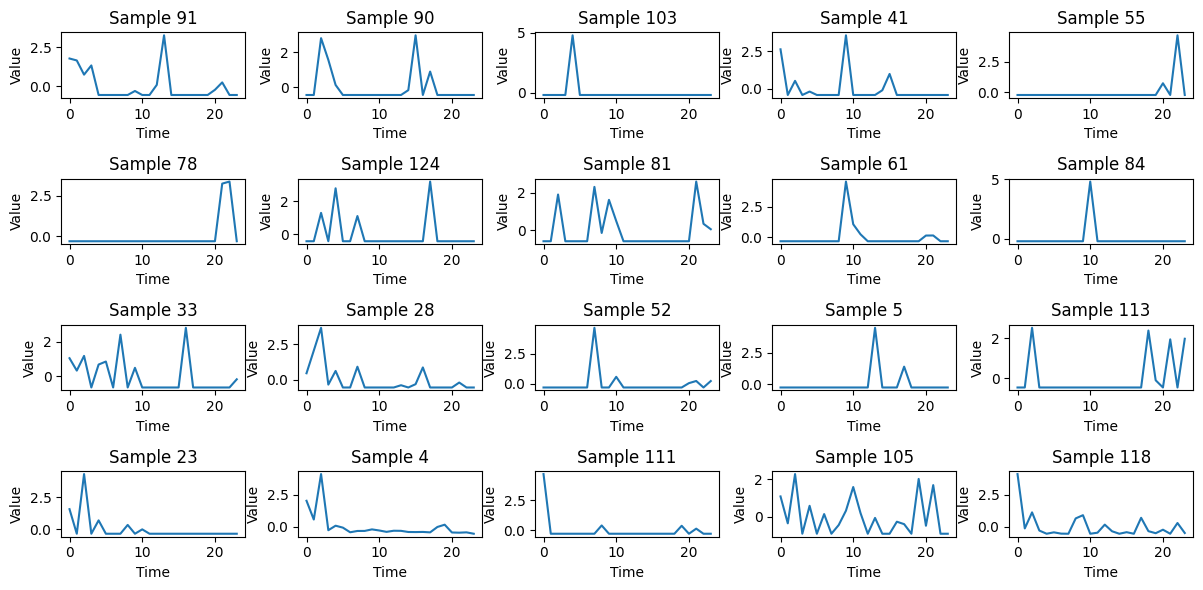

In [3]:
num_samples = 20
sample_indices = np.random.choice(X_train.shape[0], num_samples, replace=False)

# Plot the selected samples
plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices, 1):
    plt.subplot(4, 5, i)  # Adjust subplot grid as needed
    plt.plot(X_train[idx, :, 0])
    plt.title(f"Sample {idx}")
    plt.xlabel("Time")
    plt.ylabel("Value")

plt.tight_layout()

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


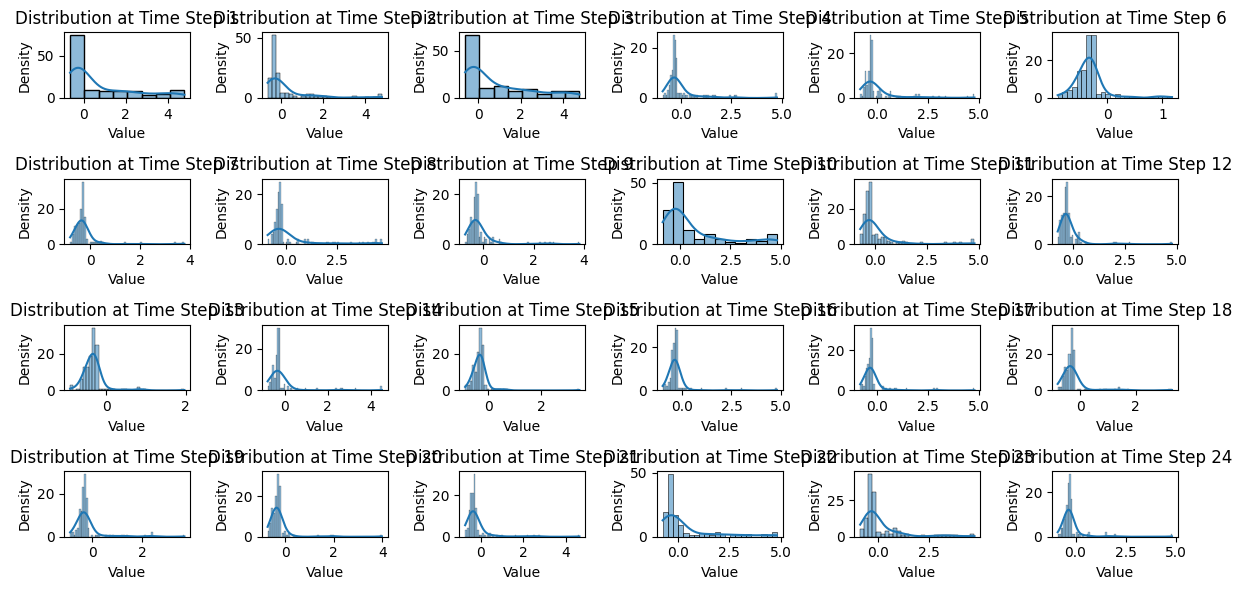

In [4]:
import seaborn as sns

flattened_data = X_train.reshape(-1, X_train.shape[1])

plt.figure(figsize=(12, 6))
for i in range(flattened_data.shape[1]):
    plt.subplot(4, 6, i+1)  # Adjust subplot grid as needed
    sns.histplot(flattened_data[:, i], kde=True)
    plt.title(f"Distribution at Time Step {i+1}")
    plt.xlabel("Value")
    plt.ylabel("Density")

plt.tight_layout()

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


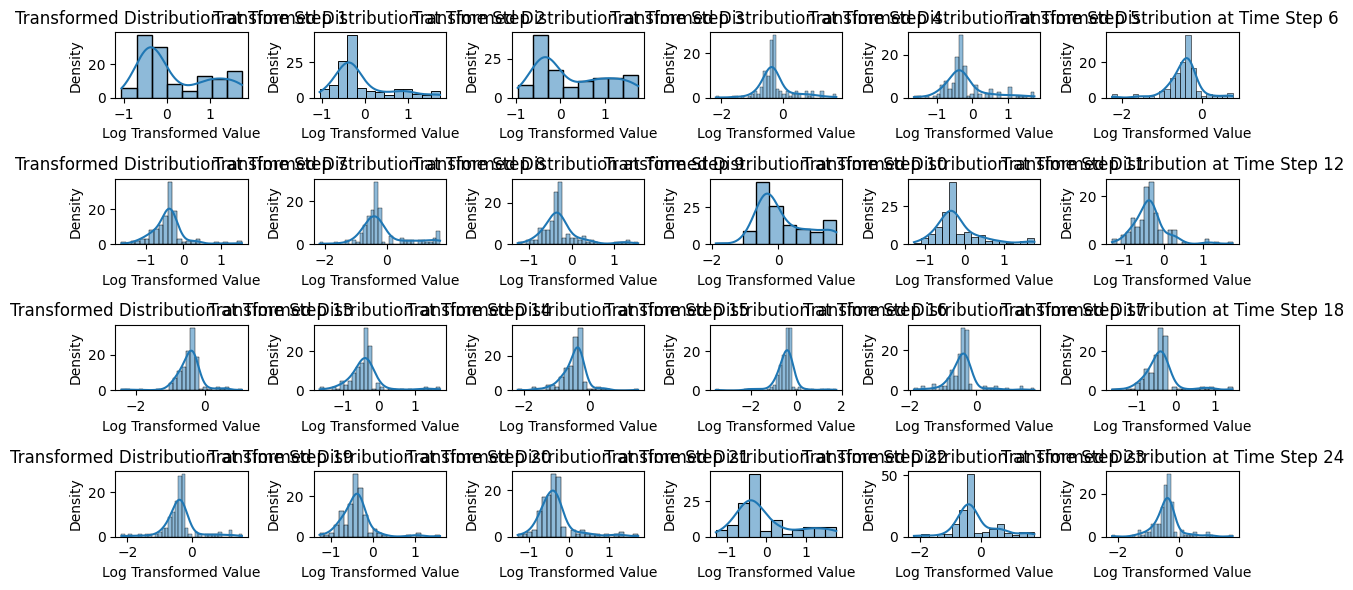

In [5]:
X_train_log = np.log(X_train + 1)

flattened_data_log = X_train_log.reshape(-1, X_train_log.shape[1])

plt.figure(figsize=(12, 6))
for i in range(flattened_data_log.shape[1]):
    plt.subplot(4, 6, i+1)
    sns.histplot(flattened_data_log[:, i], kde=True)
    plt.title(f"Transformed Distribution at Time Step {i+1}")
    plt.xlabel("Log Transformed Value")
    plt.ylabel("Density")

plt.tight_layout()


In [6]:
from sklearn import cluster
from sklearn import covariance

alphas = np.logspace(-1.5, 1, num=10)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)

X_train_reshaped = np.reshape(X_train_log, (24, 125))

edge_model.fit(X_train_reshaped)

_, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=0)
labels.shape

C:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


(125,)

In [7]:
n_labels = labels.max()
names = data.index

for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(names[labels == i])}")


Cluster 1: Flores, Natal, 3016.0, 3029.0, 4182.0
Cluster 2: Fontes, Frutos e Vegetais, 3030.0, 3031.0, 3108.0, 3112.0, 3134.0, 4174.0, 5825.0
Cluster 3: 3003.0, 3005.0, 3006.0, 3100.0, 3101.0, 3102.0, 5982.0, 5984.0, 5988.0
Cluster 4: Casa, 3018.0, 3045.0, 3135.0, 3136.0, 4181.0, 4610.0, 5986.0
Cluster 5: 3032.0, 3036.0, 3091.0, 3888.0, 5056.0
Cluster 6: 3028.0, 3034.0, 3037.0, 3041.0, 3092.0
Cluster 7: 3002.0, 3038.0
Cluster 8: Artigos Decorativos, 3039.0, 4175.0
Cluster 9: 3048.0, 3049.0, 3109.0, 4172.0, 4173.0, 5990.0, 5991.0
Cluster 10: Plantas, Árvores e Arbustos, 3009.0, 3011.0, 3012.0, 3050.0, 3086.0
Cluster 11: Tufos e Folhagens, 3008.0, 3054.0, 3084.0, 3114.0, 5985.0, 5992.0, 5996.0
Cluster 12: 3085.0, 3118.0, 4183.0
Cluster 13: 3004.0, 3093.0, 4176.0, 5995.0
Cluster 14: 3094.0, 5820.0
Cluster 15: 3007.0, 3015.0, 3098.0, 3732.0, 3886.0, 4184.0
Cluster 16: 3087.0, 3107.0, 3110.0, 5993.0
Cluster 17: 3010.0, 3040.0, 3111.0
Cluster 18: 3090.0, 3117.0
Cluster 19: 3053.0, 3089.0, 31

### 2D linear manifold and partial correlation strength

(-0.24572712746944725, 0.22887236265426197)

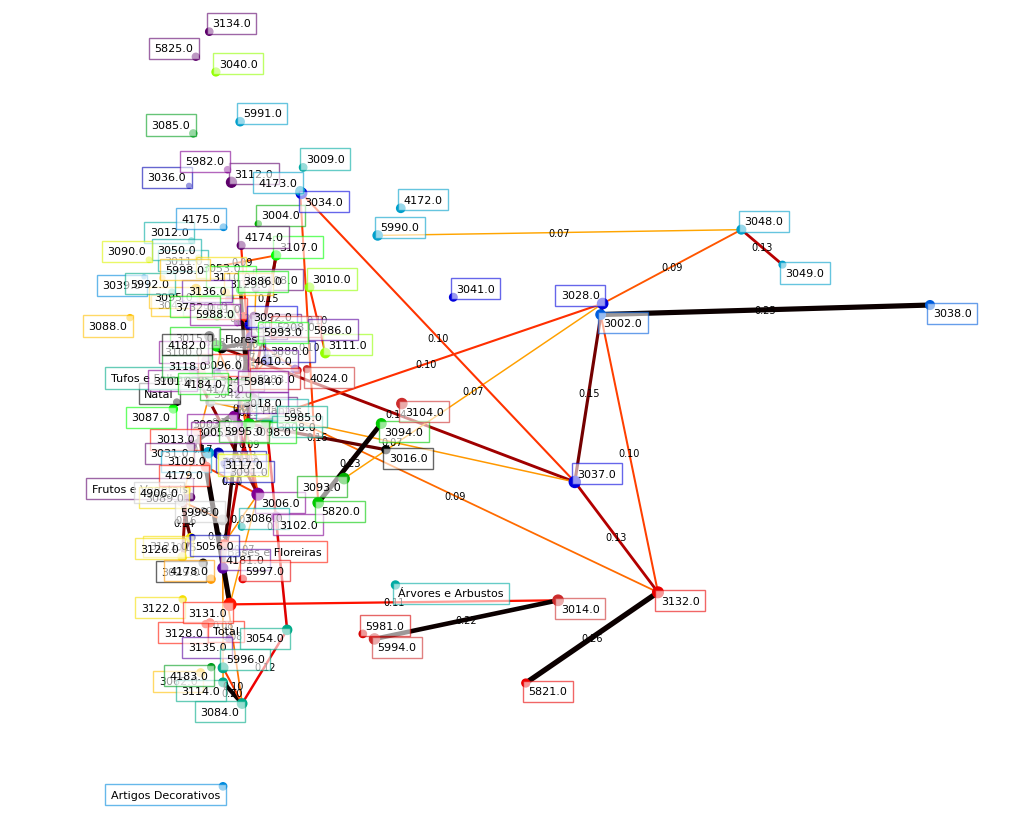

In [8]:
from sklearn import manifold

node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver="dense", n_neighbors=6
)

embedding = node_position_model.fit_transform(X_train_reshaped.T).T

import matplotlib.pyplot as plt
# color and thickness is deternmined by strength of correlation
from matplotlib.collections import LineCollection

min_partial_corr = 0.07

plt.figure(1, facecolor="w", figsize=(10, 8))
plt.clf()
ax = plt.axes([0.0, 0.0, 1.0, 1.0])
plt.axis("off")

# Plot the graph of partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]

# edges are only drawn if partial correlations > min_partial_corr
non_zero = np.abs(np.triu(partial_correlations, k=1)) > min_partial_corr

# Plot the nodes using the coordinates of our embedding
plt.scatter(
    embedding[0], embedding[1], s=100 * d**2, c=labels, cmap=plt.cm.nipy_spectral
)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [
    [embedding[:, start], embedding[:, stop]] for start, stop in zip(start_idx, end_idx)
]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.hot_r, norm=plt.Normalize(0, 0.7 * values.max())
)
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# add strength label to each connection
for segment, value in zip(segments, values):
    midpoint = np.mean(segment, axis=0)
    plt.text(midpoint[0], midpoint[1], f"{value:.2f}", color="black", fontsize=7, ha="center", va="center")


# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):
    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = "left"
        x = x + 0.002
    else:
        horizontalalignment = "right"
        x = x - 0.002
    if this_dy > 0:
        verticalalignment = "bottom"
        y = y + 0.002
    else:
        verticalalignment = "top"
        y = y - 0.002
    plt.text(
        x,
        y,
        name,
        size=8,
        horizontalalignment=horizontalalignment,
        verticalalignment=verticalalignment,
        bbox=dict(
            facecolor="w",
            edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
            alpha=0.6,
        ),
    )

plt.xlim(
    embedding[0].min() - 0.15 * np.ptp(embedding[0]),
    embedding[0].max() + 0.10 * np.ptp(embedding[0]),
)
plt.ylim(
    embedding[1].min() - 0.03 * np.ptp(embedding[1]),
    embedding[1].max() + 0.03 * np.ptp(embedding[1]),
)
